In [1]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import glob
import csv
import matplotlib
import os
import pandas as pd

from topological_metrics import *
from utils import *

## Load graphs

In [2]:
dataset = "pr_school";gap = 300;nb_states_L = 3;nb_states_e = 8
#dataset = "h_school11";gap = 1200;nb_states_L = 3;nb_states_e = 7
#dataset = "h_school13";gap = 1200;nb_states_L = 4;nb_states_e = 29
#dataset = "InVS15";gap = 3600;nb_states_L = 3;nb_states_e = 12
#dataset = "hypertext";gap = 1200;nb_states_L = 3;nb_states_e = 20

Original

In [3]:
edgelist_D = pd.read_csv("Datasets/"+dataset+".dat",sep=" ",names=["t","i","j"])
graph_D = build_graphs(edgelist_D,gap)

In [4]:
d = 2
path = "Generated_graphs/d%d/"%d

E

In [5]:

directory = path+"%s_E_gap_%d_%d_states_e/"%(dataset,gap,nb_states_e)

runs_E = len(glob.glob1(directory,"*.dat"))
print('runs',runs_E)
graph_E_list = []
edgelist_E_list = []
for n in range(runs_E):
    data_in = pd.read_csv(directory+"/%d.dat"%n,sep=" ",names=["t","i","j"])
    graph_E_list.append(build_graphs(data_in,gap))
    edgelist_E_list.append(data_in)

runs 10


ES

In [6]:

directory = path+"%s_ES_gap_%d_%d_states_e_%d_states_L/"%(dataset,gap,nb_states_e,nb_states_L)

runs_ES = len(glob.glob1(directory,"*.dat"))
print('runs',runs_ES)
graph_ES_list = []
edgelist_ES_list = []
for n in range(runs_ES):
    data_in = pd.read_csv(directory+"/%d.dat"%n,sep=" ",names=["t","i","j"])
    graph_ES_list.append(build_graphs(data_in,gap))
    edgelist_ES_list.append(data_in)

runs 10


EST

In [7]:

directory = path+"%s_EST_gap_%d_%d_states_e_%d_states_L/"%(dataset,gap,nb_states_e,nb_states_L)

runs_EST = len(glob.glob1(directory,"*.dat"))
print('runs',runs_EST)
graph_EST_list = []
edgelist_EST_list = []
for n in range(runs_EST):
    data_in = pd.read_csv(directory+"/%d.dat"%n,sep=" ",names=["t","i","j"])
    graph_EST_list.append(build_graphs(data_in,gap))
    edgelist_EST_list.append(data_in)

runs 10


## Compute measures

In [8]:

clust_D = global_clustering(graph_D)

clust_E = []
for n in range(runs_E):
    clust_E.append(global_clustering(graph_E_list[n]))

clust_ES = []
for n in range(runs_ES):
    clust_ES.append(global_clustering(graph_ES_list[n]))

clust_EST = []
for n in range(runs_EST):
    clust_EST.append(global_clustering(graph_EST_list[n]))


In [9]:

weight_D = dist_weight_of_edges(graph_D)

weight_E = []
for n in range(runs_E):
    weight_E.append(dist_weight_of_edges(graph_E_list[n]))

weight_ES = []
for n in range(runs_ES):
    weight_ES.append(dist_weight_of_edges(graph_ES_list[n]))

weight_EST = []
for n in range(runs_EST):
    weight_EST.append(dist_weight_of_edges(graph_EST_list[n]))


In [10]:

nb_int_D = dist_nb_of_interactions(graph_D)

nb_int_E = []
for n in range(runs_E):
    nb_int_E.append(dist_nb_of_interactions(graph_E_list[n]))

nb_int_ES = []
for n in range(runs_ES):
    nb_int_ES.append(dist_nb_of_interactions(graph_ES_list[n]))

nb_int_EST = []
for n in range(runs_EST):
    nb_int_EST.append(dist_nb_of_interactions(graph_EST_list[n]))


In [11]:

assort_D = get_ass(graph_D)

assort_E = []
for n in range(runs_E):
    assort_E.append(get_ass(graph_E_list[n]))

assort_ES = []
for n in range(runs_ES):
    assort_ES.append(get_ass(graph_ES_list[n]))

assort_EST = []
for n in range(runs_EST):
    assort_EST.append(get_ass(graph_EST_list[n]))


/home/cencetti/anaconda3/lib/python3.11/site-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))


In [12]:

l_cc_D = largest_cc(graph_D)

l_cc_E = []
for n in range(runs_E):
    l_cc_E.append(largest_cc(graph_E_list[n]))

l_cc_ES = []
for n in range(runs_ES):
    l_cc_ES.append(largest_cc(graph_ES_list[n]))

l_cc_EST = []
for n in range(runs_EST):
    l_cc_EST.append(largest_cc(graph_EST_list[n]))


In [13]:

dur_D, ic_dur_D = cont_and_inter_cont_duration(graph_D)

dur_E = []
ic_dur_E = []
for n in range(runs_E):
    dd, ii = cont_and_inter_cont_duration(graph_E_list[n])
    dur_E.append(dd)
    ic_dur_E.append(ii)

dur_ES = []
ic_dur_ES = []
for n in range(runs_ES):
    dd, ii = cont_and_inter_cont_duration(graph_ES_list[n])
    dur_ES.append(dd)
    ic_dur_ES.append(ii)

dur_EST = []
ic_dur_EST = []
for n in range(runs_EST):
    dd, ii = cont_and_inter_cont_duration(graph_EST_list[n])
    dur_EST.append(dd)
    ic_dur_EST.append(ii)


In [14]:

# Cut inter-contact durations to exclude the nights
if dataset == 'pr_school':
    ic_dur_max = 170
elif dataset == 'h_school11':
    ic_dur_max = 40
elif dataset == 'h_school13':
    ic_dur_max = 30
elif dataset == 'InVS15':
    ic_dur_max = 10
elif dataset == 'hypertext':
    ic_dur_max = 36

ic_dur_D_cut = [x for x in ic_dur_D if x < ic_dur_max]

ic_dur_E_cut = []
for n in range(runs_E):
    ic_dur_E_cut.append([x for x in ic_dur_E[n] if x < ic_dur_max])
    
ic_dur_ES_cut = []
for n in range(runs_ES):
    ic_dur_ES_cut.append([x for x in ic_dur_ES[n] if x < ic_dur_max])
    
ic_dur_EST_cut = []
for n in range(runs_EST):
    ic_dur_EST_cut.append([x for x in ic_dur_EST[n] if x < ic_dur_max])


In [15]:

deg_D = dist_degree(graph_D)

deg_E = []
for n in range(runs_E):
    deg_E.append(dist_degree(graph_E_list[n]))

deg_ES = []
for n in range(runs_ES):
    deg_ES.append(dist_degree(graph_ES_list[n]))

deg_EST = []
for n in range(runs_EST):
    deg_EST.append(dist_degree(graph_EST_list[n]))


In [16]:

str_D = strength(graph_D)

str_E = []
for n in range(runs_E):
    str_E.append(strength(graph_E_list[n]))

str_ES = []
for n in range(runs_ES):
    str_ES.append(strength(graph_ES_list[n]))

str_EST = []
for n in range(runs_EST):
    str_EST.append(strength(graph_EST_list[n]))


In [17]:

HO_D = HO_size(graph_D)

HO_E = []
for n in range(runs_E):
    HO_E.append(HO_size(graph_E_list[n]))

HO_ES = []
for n in range(runs_ES):
    HO_ES.append(HO_size(graph_ES_list[n]))

HO_EST = []
for n in range(runs_EST):
    HO_EST.append(HO_size(graph_EST_list[n]))


In [18]:
deltat = gap*10

train_ev_D = nb_ev_train(edgelist_D,gap,deltat)

train_ev_E = []
for n in range(runs_E):
    train_ev_E.append(nb_ev_train(edgelist_E_list[n],gap,deltat))

train_ev_ES = []
for n in range(runs_ES):
    train_ev_ES.append(nb_ev_train(edgelist_ES_list[n],gap,deltat))
    
train_ev_EST = []
for n in range(runs_EST):
    train_ev_EST.append(nb_ev_train(edgelist_EST_list[n],gap,deltat))

## Save distributions

In [19]:
def save_data(name,distr_D,distr_E,distr_ES,distr_EST):
    
    directory = 'figs/dist_data/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    filename = directory +dataset+'_gap_%d'%gap+'_'+name+'_D.csv'
    #print(filename)
    save_on_csv(filename,distr_D,'w')

    filename = directory +dataset+'_gap_%d'%gap+'_'+name+'_E.csv'
    #print(filename)
    save_on_csv(filename,distr_E,'w')
    
    filename = directory +dataset+'_gap_%d'%gap+'_'+name+'_ES.csv'
    #print(filename)
    save_on_csv(filename,distr_ES,'w')
    
    filename = directory +dataset+'_gap_%d'%gap+'_'+name+'_EST.csv'
    #print(filename)
    save_on_csv(filename,distr_EST,'w')

In [20]:
save_data('clust',clust_D,clust_E,clust_ES,clust_EST)

In [21]:
save_data('weight',weight_D,weight_E,weight_ES,weight_EST)

In [22]:
save_data('nb_int',nb_int_D,nb_int_E,nb_int_ES,nb_int_EST)

In [23]:
save_data('assort',assort_D,assort_E,assort_ES,assort_EST)

In [24]:
save_data('l_cc',l_cc_D,l_cc_E,l_cc_ES,l_cc_EST)

In [25]:
save_data('dur',dur_D,dur_E,dur_ES,dur_EST)

In [26]:
save_data('ic_dur_cut',ic_dur_D_cut,ic_dur_E_cut,ic_dur_ES_cut,ic_dur_EST_cut)

In [27]:
save_data('str',str_D,str_E,str_ES,str_EST)

In [28]:
save_data('deg',deg_D,deg_E,deg_ES,deg_EST)

In [29]:
save_data('HO',HO_D,HO_E,HO_ES,HO_EST)

In [30]:
save_data('train_ev',train_ev_D,train_ev_E,train_ev_ES,train_ev_EST)

## Load distributions:

In [31]:
directory = '../figs/distributions/dist_data/'

In [34]:
for measure in ['clust','weight','nb_int','assort','l_cc','dur','ic_dur_cut','str','deg','HO','train_ev']:
    globals()['%s_D'%measure] = load_list_csv('figs/dist_data/%s_gap_%d_%s_D.csv'%(dataset,gap,measure))
    globals()['%s_E'%measure] = load_list_of_lists_csv('figs/dist_data/%s_gap_%d_%s_E.csv'%(dataset,gap,measure))
    globals()['%s_ES'%measure] = load_list_of_lists_csv('figs/dist_data/%s_gap_%d_%s_ES.csv'%(dataset,gap,measure))
    globals()['%s_EST'%measure] = load_list_of_lists_csv('figs/dist_data/%s_gap_%d_%s_EST.csv'%(dataset,gap,measure))

## Plot histograms

In [36]:
def subfig_histogram(distr_D,distr_E,distr_ES,distr_EST,num_bin,ax,measure,xscale,yscale):
    
    Min = min(distr_D)
    Max = max(distr_D)
    for n in range(len(distr_E)):
        M = max(distr_E[n])
        if M > Max:
            Max = M
        m = min(distr_E[n])
        if m < Min:
            Min = m
    for n in range(len(distr_ES)):
        M = max(distr_ES[n])
        if M > Max:
            Max = M
        m = min(distr_ES[n])
        if m < Min:
            Min = m
    for n in range(len(distr_EST)):
        M = max(distr_EST[n])
        if M > Max:
            Max = M
        m = min(distr_EST[n])
        if m < Min:
            Min = m
    bin_lims = np.linspace(Min,Max,num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
    
    ##computing the histograms
    hist_D, _ = np.histogram(distr_D, bins=bin_lims,density=True)
    
    hist_E = []
    for distr in distr_E:
        hist_E_tmp, _ = np.histogram(distr, bins=bin_lims,density=True)
        hist_E.append(hist_E_tmp)
    hist_E_mean = np.mean(hist_E,axis=0)
    hist_E_std = np.std(hist_E,axis=0)
    
    hist_ES = []
    for distr in distr_ES:
        hist_ES_tmp, _ = np.histogram(distr, bins=bin_lims,density=True)
        hist_ES.append(hist_ES_tmp)
    hist_ES_mean = np.mean(hist_ES,axis=0)
    hist_ES_std = np.std(hist_ES,axis=0)
    
    hist_EST = []
    for distr in distr_EST:
        hist_EST_tmp, _ = np.histogram(distr, bins=bin_lims,density=True)
        hist_EST.append(hist_EST_tmp)
    hist_EST_mean = np.mean(hist_EST,axis=0)
    hist_EST_std = np.std(hist_EST,axis=0)
    
    # D
    ax.plot(bin_centers, hist_D,'o',markersize=15, label='D',color=original_color)
    # E
    ax.errorbar(bin_centers, hist_E_mean,yerr=hist_E_std,fmt='^',markersize=11, label='E',color=b_color)
    # ES
    ax.errorbar(bin_centers, hist_ES_mean,yerr=hist_ES_std,fmt='v',markersize=11, label='ES',color=cl_color)
    # EST
    ax.errorbar(bin_centers, hist_EST_mean,yerr=hist_EST_std,fmt='o',markersize=11, label='EST',color=mem_color)
    ax.set_xlabel(measure)  
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    


In [37]:
original_color = "#656565"
b_color = '#ffcc5c'
cl_color = '#88d8b0'
mem_color = '#ff6f69'

In [38]:
plt.rcParams.update({'font.size': 25}) 

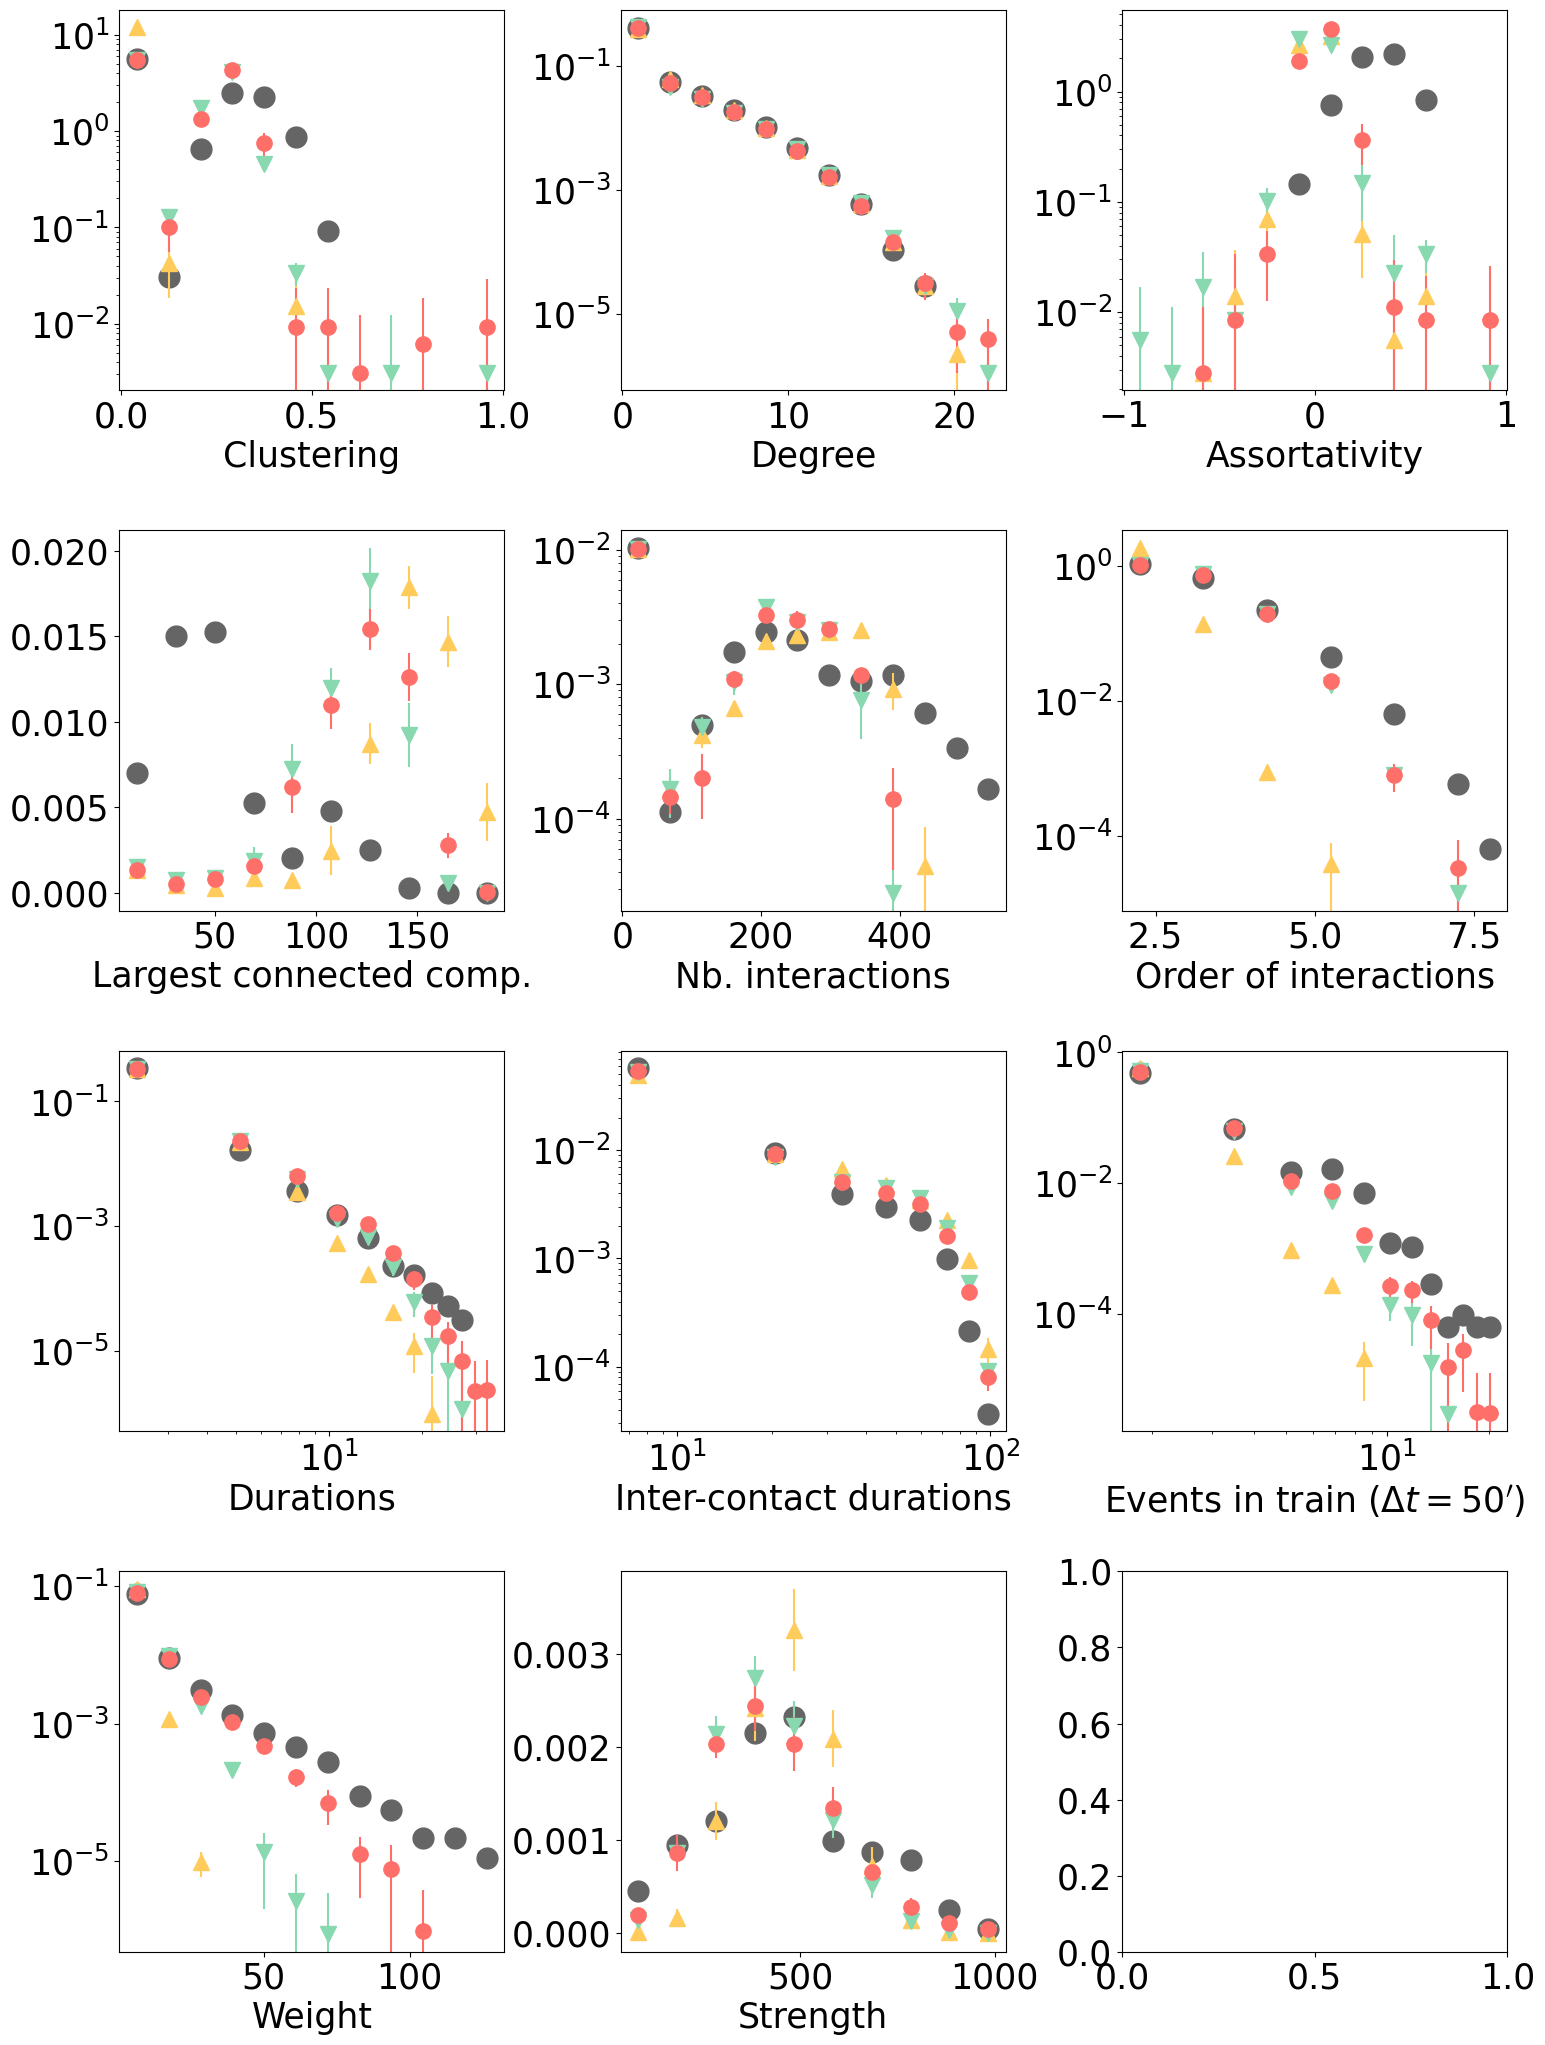

In [52]:

fig, axs = plt.subplots(nrows = 4, ncols = 3,figsize=(16,21))

subfig_histogram(clust_D,clust_E,clust_ES,clust_EST,12,axs[0,0],'Clustering','linear','log')

subfig_histogram(deg_D,deg_E,deg_ES,deg_EST,12,axs[0,1],'Degree','linear','log')      

subfig_histogram(assort_D,assort_E,assort_ES,assort_EST,12,axs[0,2],'Assortativity','linear','log')

subfig_histogram(l_cc_D,l_cc_E,l_cc_ES,l_cc_EST,10,axs[1,0],'Largest connected comp.','linear','linear')

subfig_histogram(nb_int_D,nb_int_E,nb_int_ES,nb_int_EST,12,axs[1,1],'Nb. interactions','linear','log')

subfig_histogram(HO_D,HO_E,HO_ES,HO_EST,12,axs[1,2],'Order of interactions','linear','log')

subfig_histogram(dur_D,dur_E,dur_ES,dur_EST,12,axs[2,0],'Durations','log','log')            

subfig_histogram(ic_dur_D_cut,ic_dur_E_cut,ic_dur_ES_cut,ic_dur_EST_cut,8,axs[2,1],'Inter-contact durations','log','log')            

subfig_histogram(train_ev_D,train_ev_E,train_ev_ES,train_ev_EST,12,axs[2,2],r"Events in train ($\Delta t=50'$)",'log','log')

subfig_histogram(weight_D,weight_E,weight_ES,weight_EST,12,axs[3,0],'Weight','linear','log')

subfig_histogram(str_D,str_E,str_ES,str_EST,10,axs[3,1],'Strength','linear','linear')            



text = axs[2,0].text(0,0, "", transform=axs[0,0].transAxes)

fig.tight_layout(w_pad=-0)
filename = 'figs/distributions_'+dataset+'.pdf'
plt.savefig(filename, bbox_inches='tight')
plt.show()
